In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
plt.rcParams['figure.figsize'] = (11,7)

In [2]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.shape

(7787, 12)

# EXPLORATORY ANALYSIS

## Drop show_id column 

In [4]:
df.drop('show_id', axis=1, inplace=True)

## Check for missing values

In [5]:
df.isnull().any()

type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [6]:
df.isna().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Fill the missing values and drop date_added and rating as it's no of missing values is insignificant to the dataset

In [7]:
df['director'].fillna(df['director'].mode()[0],inplace=True)
df['cast'].fillna(df['cast'].mode()[0],inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df.dropna(inplace=True)

In [8]:
df.shape 
#17 rows were dropped

(7770, 11)

## Change the format of data_added and duraton

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['duration'] = df['duration'].apply(lambda x: x.split(' ')[0])
df['duration'] = pd.to_numeric(df['duration'])

df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


In [10]:
df.profile_report()

## TYPE

In [11]:
type=df.type.value_counts()
type

Movie      5372
TV Show    2398
Name: type, dtype: int64

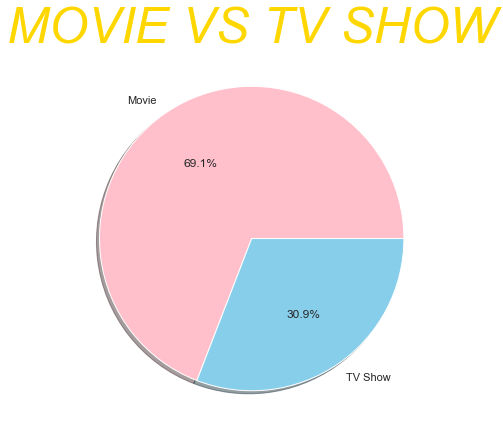

In [12]:
plt.title("MOVIE VS TV SHOW", fontsize = 50, loc = 'center',fontstyle= "italic",color= 'gold')

labels = ['Movie','TV Show']
colors = ['pink','skyblue']

plt.pie(type,labels=labels,colors=colors,autopct='%.1f%%',shadow=True)
plt.show()

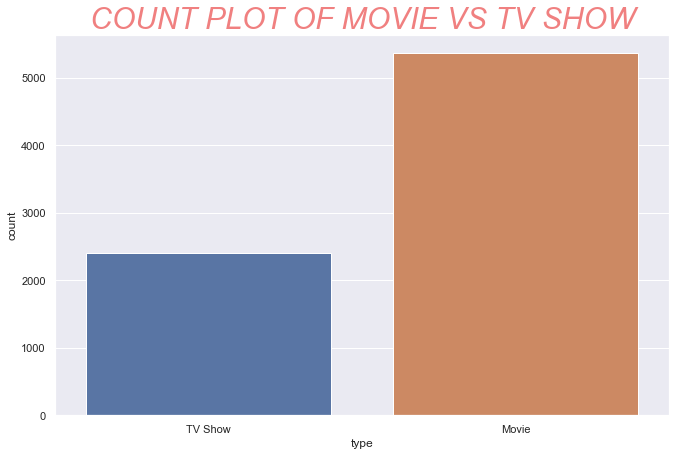

In [13]:
plt.title("COUNT PLOT OF MOVIE VS TV SHOW", fontsize = 30, loc = 'center',fontstyle= "oblique",color= 'lightcoral')
sns.countplot(x="type", data=df)
plt.show()

## TITLE

In [14]:
title_desc = df[["title", "description"]]
title_desc.head()

,title,description
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,"When an army recruit is found dead, his fellow..."
3,9,"In a postapocalyptic world, rag-doll robots hi..."
4,21,A brilliant group of students become card-coun...


## DIRECTOR

## Creating a function that returns the director in the country entered. The same can be done for each titles. Remember it is case sensitive.

In [15]:
def get_director(country):
    country_director = df[df['country'] == country]
    country_director = country_director.groupby('director').count().sort_values('type',ascending=False)
    country_director.reset_index(inplace = True)
    country_director = country_director[['director','type']].head(10)
    country_director = country_director.sort_values('type',ascending=False)

    return country_director

In [16]:
get_director('Brazil')

,director,type
0,"Raúl Campos, Jan Suter",23
1,Lucas Margutti,3
2,Diego Pignataro,3
3,Alexandre Avancini,2
4,Rodrigo Van Der Put,2
5,Bruno Garotti,2
6,Marcelo Galvão,2
7,Matheus Souza,1
8,Luis Ara,1
9,"Lygia Barbosa da Silva, Eliane Brum",1


In [17]:
def director(title):
    title_director = df[df['title'] == title]
    title_director = title_director.groupby('director').count().sort_values('type',ascending=False)
    title_director.reset_index(inplace = True)
    title_director = title_director[['director','type']]
    title_director = title_director.sort_values('type',ascending=False)

    return title_director

In [18]:
director('23:59')

,director,type
0,Gilbert Chan,1


## Filtering through director column, split by comma to plot a graph 

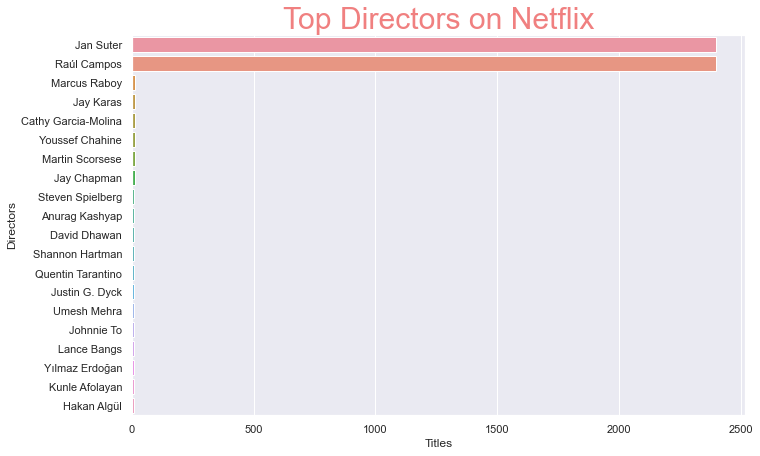

In [19]:
filter_director = df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
sns.countplot(y = filter_director, order=filter_director.value_counts().index[:20])
plt.title('Top Directors on Netflix',fontsize=30, color='lightcoral')
plt.xlabel('Titles')
plt.ylabel('Directors')
plt.show()

## CAST

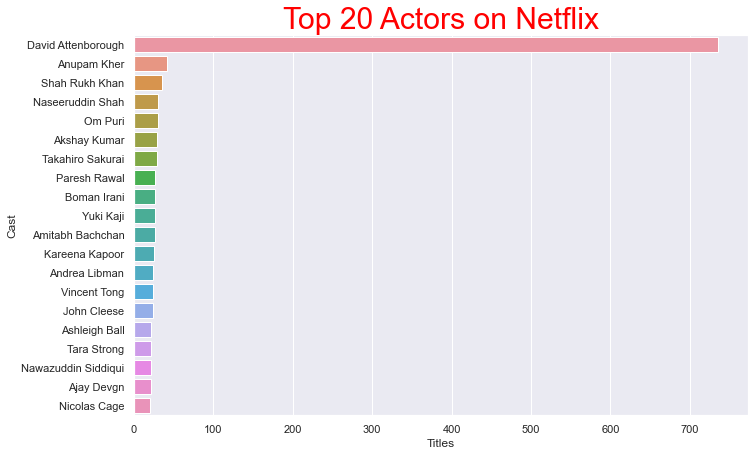

In [20]:
filter_cast = df.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
sns.countplot(y = filter_cast, order=filter_cast.value_counts().index[:20])
plt.title('Top 20 Actors on Netflix',fontsize=30, color='red')
plt.xlabel('Titles')
plt.ylabel('Cast')
plt.show()

## Creating a function that returns the cast of a movie when the title is called

In [21]:
def get_cast(Title):
    title_cast = df[df['title'] == Title]
    title_cast = title_cast.groupby('cast').count().sort_values('type',ascending=False)
    title_cast.reset_index(inplace = True)
    title_cast = title_cast[['cast','type']].head(10)
    title_cast = title_cast.sort_values('type',ascending=False)

    return title_cast

In [22]:
get_cast('Zozo')

,cast,type
0,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",1


## COUNTRY

In [23]:
df["country"].value_counts().head()

United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Name: country, dtype: int64

In [24]:
df.groupby('country').count().sort_values('type', ascending = False).head()

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,
United States,3051,3051,3051,3051,3051,3051,3051,3051,3051,3051
India,923,923,923,923,923,923,923,923,923,923
United Kingdom,396,396,396,396,396,396,396,396,396,396
Japan,224,224,224,224,224,224,224,224,224,224
South Korea,183,183,183,183,183,183,183,183,183,183


In [25]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

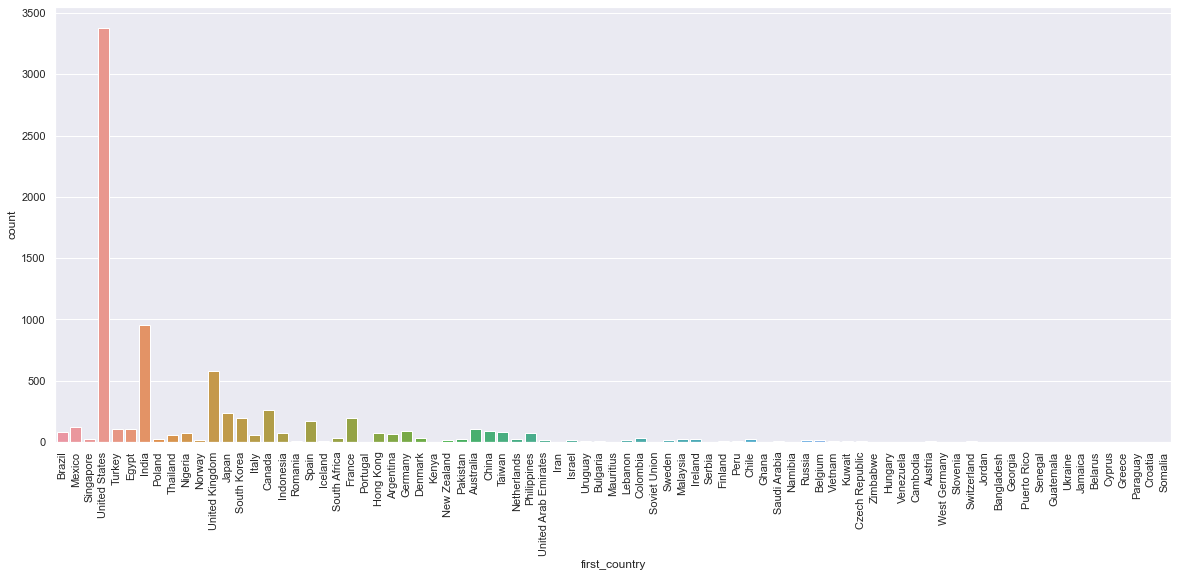

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x="first_country",data=df)
plt.xticks(rotation=90)
plt.show()

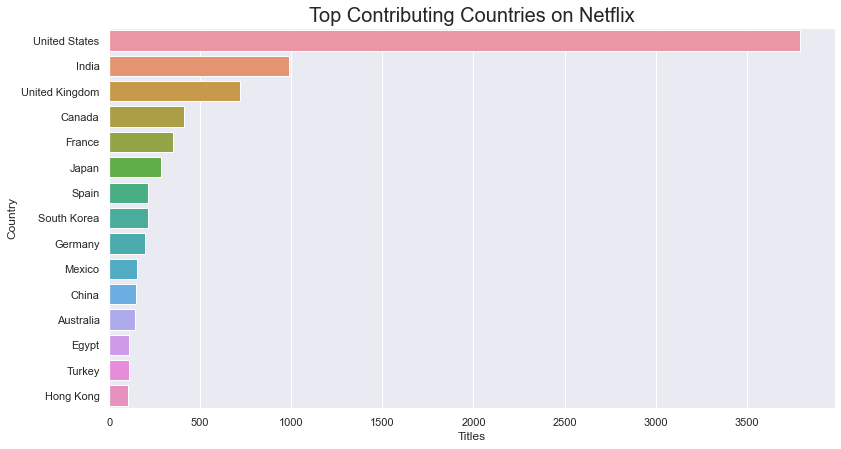

In [27]:
filter_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(13,7))
sns.countplot(y = filter_countries, order=filter_countries.value_counts().index[:15])
plt.title('Top Contributing Countries on Netflix',fontsize=20)
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

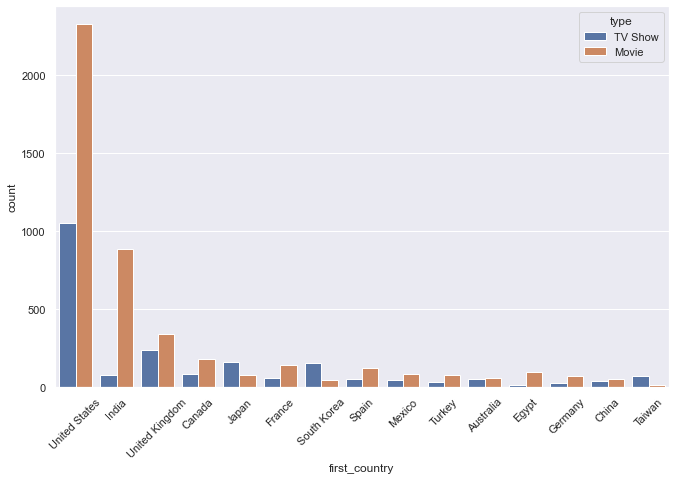

In [28]:
top_countries = df['first_country'].value_counts()[:15]

sns.countplot(x='first_country', order= top_countries.index, data=df,hue="type")
plt.xticks(rotation=45)
plt.show()

## RELEASE YEAR

In [29]:
pd.DataFrame(df['release_year'].value_counts()).head()

,release_year
2018,1120
2017,1010
2019,996
2016,881
2020,868


## Count plot showing all release years

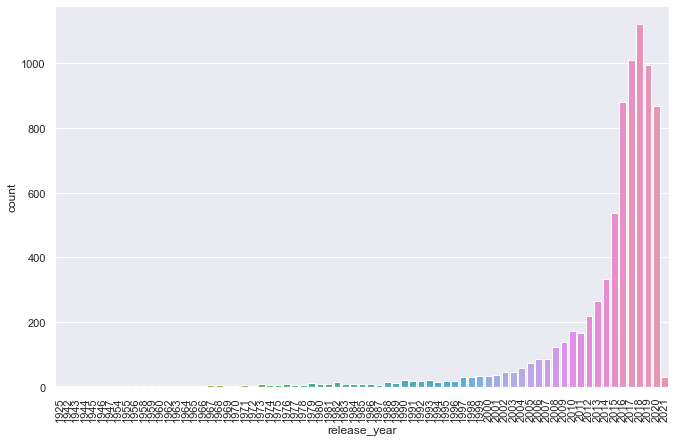

<Figure size 936x504 with 0 Axes>

In [30]:
sns.countplot(x="release_year", data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(13,7))

plt.show()

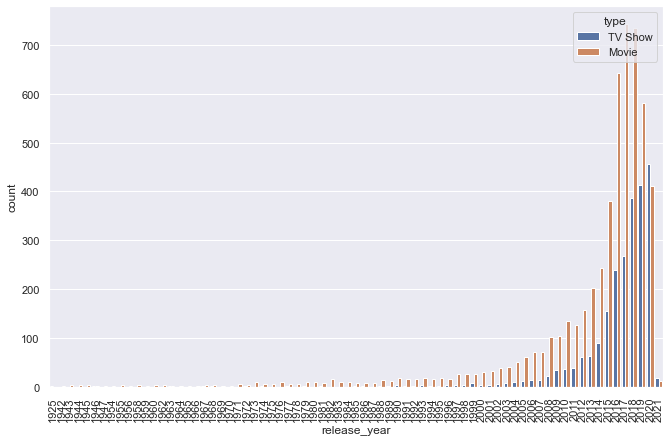

<Figure size 936x504 with 0 Axes>

In [31]:
sns.countplot(x="release_year", hue="type", data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(13,7))

plt.show()

## Count plot showing release years from 2000 till date in respect to the type

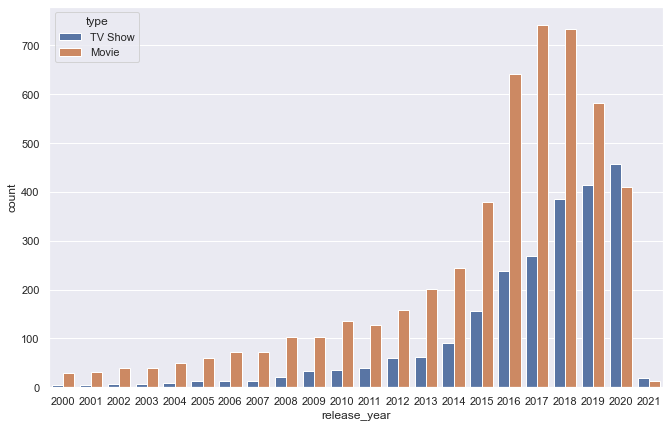

In [32]:
year= df[df["release_year"] >= 2000]
sns.countplot(x="release_year", hue="type", data=year)
plt.show()

## Sorting the movies by their release years from oldest to latest

In [33]:
sorting_by_year = df.sort_values('release_year')[['type', 'title', 'release_year']]
sorting_by_year.head()

,type,title,release_year
4867,TV Show,Pioneers: First Women Filmmakers*,1925
6117,Movie,The Battle of Midway,1942
4960,Movie,Prelude to War,1942
7679,Movie,WWII: Report from the Aleutians,1943
7616,Movie,Why We Fight: The Battle of Russia,1943


## Sorting by the type(Movies & TV Shows)

In [34]:
movies=sorting_by_year[sorting_by_year['type'] == 'Movie']
movies.head()

,type,title,release_year
6117,Movie,The Battle of Midway,1942
4960,Movie,Prelude to War,1942
7679,Movie,WWII: Report from the Aleutians,1943
7616,Movie,Why We Fight: The Battle of Russia,1943
7342,Movie,Undercover: How to Operate Behind Enemy Lines,1943


In [35]:
shows=sorting_by_year[sorting_by_year['type'] == 'TV Show']
shows.head()

,type,title,release_year
4867,TV Show,Pioneers: First Women Filmmakers*,1925
4866,TV Show,Pioneers of African-American Cinema,1946
6953,TV Show,The Twilight Zone (Original Series),1963
6082,TV Show,The Andy Griffith Show,1967
5785,TV Show,Star Trek,1968


In [36]:
sorting_year = sorting_by_year[['title', 'release_year']]
sorting_year.head() 

,title,release_year
4867,Pioneers: First Women Filmmakers*,1925
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7616,Why We Fight: The Battle of Russia,1943


## RATING

In [37]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

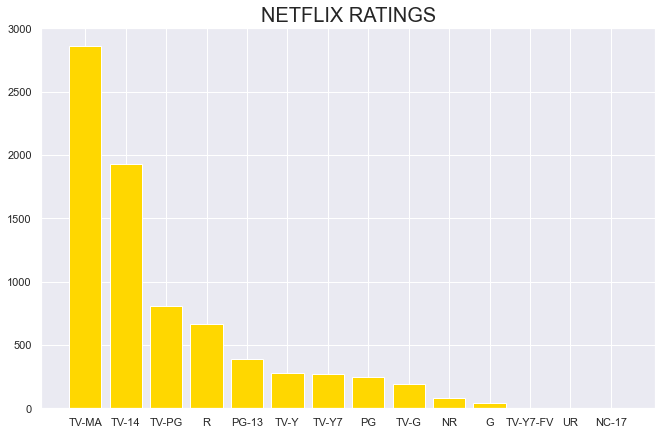

In [38]:
plt.title('NETFLIX RATINGS', fontsize=20)

ratings = df['rating'].value_counts().reset_index()

plt.bar(ratings['index'],ratings['rating'],color="gold")
plt.show()

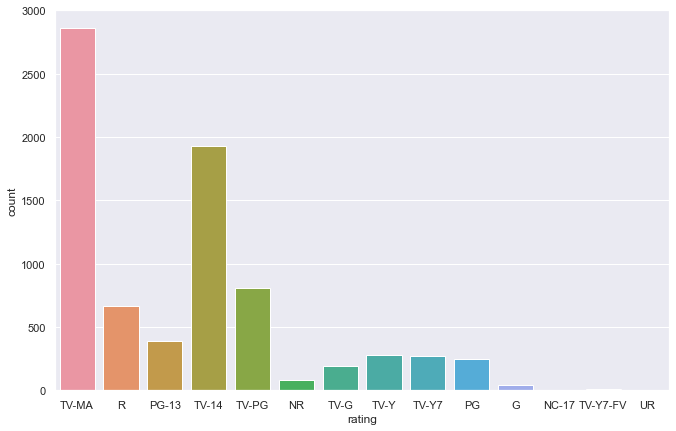

In [39]:
sns.countplot(x='rating',data=df)
plt.show()

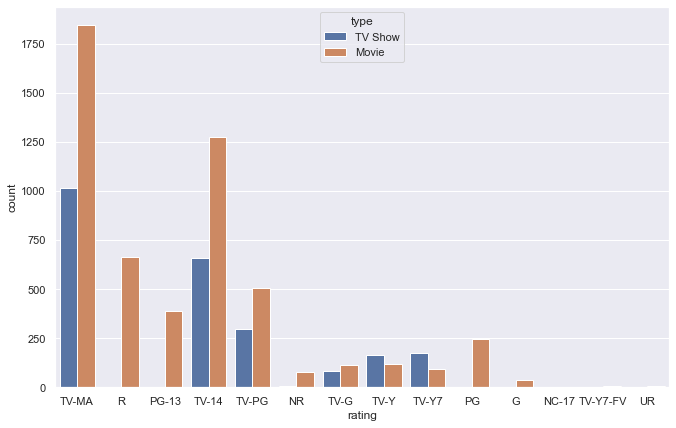

In [40]:
sns.countplot(x="rating", hue='type', data=df)
plt.show()

## DURATION 

In [41]:
min_duration = df["duration"].min()
max_duration = df["duration"].max()

print('The minimum duration is : ', min_duration)
print('The maximum duration is : ', max_duration)

The minimum duration is :  1
The maximum duration is :  312


## LISTED IN

In [42]:
df['listed_in'].value_counts()

Documentaries                                               334
Stand-Up Comedy                                             321
Dramas, International Movies                                320
Comedies, Dramas, International Movies                      243
Dramas, Independent Movies, International Movies            215
                                                           ... 
LGBTQ Movies, Thrillers                                       1
Crime TV Shows, Kids' TV                                      1
Children & Family Movies, Comedies, Faith & Spirituality      1
Kids' TV, Reality TV, TV Dramas                               1
International TV Shows, Korean TV Shows, TV Horror            1
Name: listed_in, Length: 491, dtype: int64

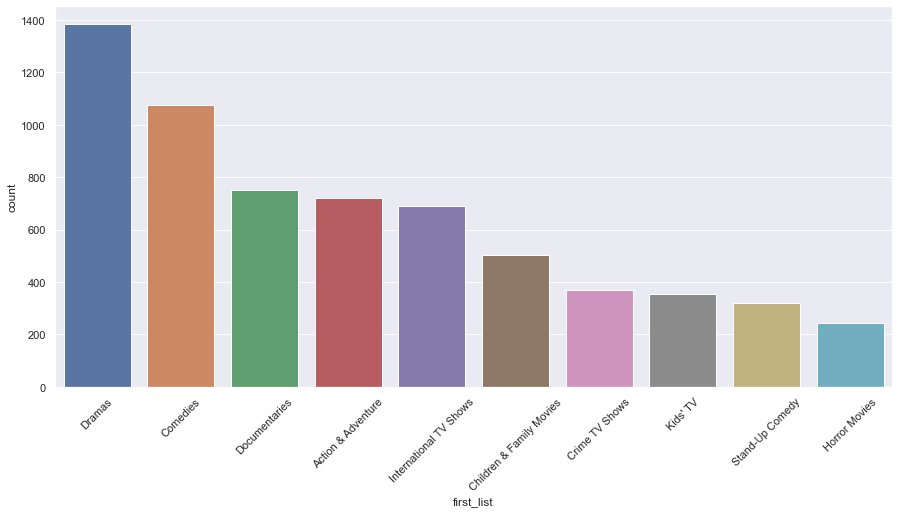

In [43]:
plt.figure(figsize=(15,7))
df['first_list'] = df['listed_in'].apply(lambda x: x.split(",")[0])
sns.countplot(x="first_list", data=df, order=df["first_list"].value_counts()[0:10].index)
plt.xticks(rotation=45)
plt.show()

# RECOMMENDATION

In [44]:
df['description'][10:15]

10    A farmer pens a confession admitting to his wi...
11    In this dark alt-history thriller, a naïve law...
12    Archival video and new interviews examine Mexi...
13    This intimate documentary follows rock star Ar...
14    Stranded when the Earth is suddenly destroyed ...
Name: description, dtype: object

In [45]:
df.sort_values('release_year')[['type', 'title', 'release_year']]

,type,title,release_year
4867,TV Show,Pioneers: First Women Filmmakers*,1925
6117,Movie,The Battle of Midway,1942
4960,Movie,Prelude to War,1942
7679,Movie,WWII: Report from the Aleutians,1943
7616,Movie,Why We Fight: The Battle of Russia,1943
...,...,...,...
4173,TV Show,Monarca,2021
3822,TV Show,Lupin,2021
980,TV Show,Bling Empire,2021
1285,Movie,Charming,2021


In [46]:
sort = df.sort_values('type')[['type', 'title', 'description']]
movie = sort[sort['type'] == 'Movie']
show = sort[sort['type'] == 'TV Show']

In [47]:
movie.tail()

,type,title,description
2449,Movie,GO! The Unforgettable Party,Mía's vacation with her dad is disrupted by th...
385,Movie,Ali Baba ve 7 Cüceler,A garden gnome vendor and his brother-in-law a...
2575,Movie,Haider,Shahid Kapoor delivers a searing performance i...
2558,Movie,Guru,Ambitious Gurukant Desai ignores his father's ...
307,Movie,ADAM SANDLER 100% FRESH,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."


In [48]:
recommend = df[['title', 'description', 'type', 'release_year']]
recommend.head()

,title,description,type,release_year
0,3%,In a future where the elite inhabit an island ...,TV Show,2020
1,7:19,After a devastating earthquake hits Mexico Cit...,Movie,2016
2,23:59,"When an army recruit is found dead, his fellow...",Movie,2011
3,9,"In a postapocalyptic world, rag-doll robots hi...",Movie,2009
4,21,A brilliant group of students become card-coun...,Movie,2008


In [49]:
recommend.title = recommend['title'].str.lower()
recommend.tail()

,title,description,type,release_year
7782,zozo,When Lebanon's Civil War deprives Zozo of his ...,Movie,2005
7783,zubaan,A scrappy but poor boy worms his way into a ty...,Movie,2015
7784,zulu man in japan,"In this documentary, South African rapper Nast...",Movie,2019
7785,zumbo's just desserts,Dessert wizard Adriano Zumbo looks for the nex...,TV Show,2019
7786,zz top: that little ol' band from texas,This documentary delves into the mystique behi...,Movie,2019


In [50]:
recommend = recommend.reset_index()

recommend.tail()

,index,title,description,type,release_year
7765,7782,zozo,When Lebanon's Civil War deprives Zozo of his ...,Movie,2005
7766,7783,zubaan,A scrappy but poor boy worms his way into a ty...,Movie,2015
7767,7784,zulu man in japan,"In this documentary, South African rapper Nast...",Movie,2019
7768,7785,zumbo's just desserts,Dessert wizard Adriano Zumbo looks for the nex...,TV Show,2019
7769,7786,zz top: that little ol' band from texas,This documentary delves into the mystique behi...,Movie,2019


In [51]:
recommend.drop('index',axis=1, inplace=True)

recommend.tail()

,title,description,type,release_year
7765,zozo,When Lebanon's Civil War deprives Zozo of his ...,Movie,2005
7766,zubaan,A scrappy but poor boy worms his way into a ty...,Movie,2015
7767,zulu man in japan,"In this documentary, South African rapper Nast...",Movie,2019
7768,zumbo's just desserts,Dessert wizard Adriano Zumbo looks for the nex...,TV Show,2019
7769,zz top: that little ol' band from texas,This documentary delves into the mystique behi...,Movie,2019


In [52]:
df['description'].isna().sum()

0

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
v= CountVectorizer(stop_words="english")
X=v.fit_transform(recommend.description)

In [54]:
X.shape

(7770, 17888)

In [55]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X, X)

In [56]:
cosine_sim.shape

(7770, 7770)

In [57]:
index = pd.Series(recommend.index, index=recommend["title"])
index

title
3%                                            0
7:19                                          1
23:59                                         2
9                                             3
21                                            4
                                           ... 
zozo                                       7765
zubaan                                     7766
zulu man in japan                          7767
zumbo's just desserts                      7768
zz top: that little ol' band from texas    7769
Length: 7770, dtype: int64

In [58]:
def recommendation(title):
    title = title.lower() # ZoZo -> zozo
    idx = index[title]    # zozo -> 7765
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    
    no_of_movies = [i[0] for i in sim_scores]
    
    return recommend.iloc[no_of_movies]

In [59]:
recommendation('zozo')

,title,description,type,release_year
7478,we are all for the fatherland,"After the 1978 Israeli invasion of Lebanon, ch...",Movie,1979
782,beasts of no nation,"When civil war tears his family apart, a young...",Movie,2015
4329,my only mother,After the untimely demise of her first three h...,Movie,2013
5552,shine your eyes,A Nigerian musician travels to Brazil to searc...,Movie,2020
363,akulah balqis,A little girl must enter an orphanage after he...,TV Show,2015


In [60]:
recommendation('chocolate city: vegas strip')

,title,description,type,release_year
1991,emogenius,Two pairs of contestants go head-to-head for s...,TV Show,2017
4444,next in fashion,Talented designers from around the world compe...,TV Show,2020
4137,mission: destroy love,Two strangers meet by chance on a trip to Thai...,Movie,2014
636,awake: the million dollar game,"Sleepless for 24 hours, contestants in the com...",TV Show,2019
2574,hakkunde,A perpetually unemployed graduate desperately ...,Movie,2017


In [61]:
recommendation("The Reliant")

,title,description,type,release_year
3467,kurt seyit & sura,A Turkish lieutenant and the daughter of Russi...,TV Show,2014
3444,krisha,"After 10 years away from her family, Krisha re...",Movie,2015
3246,justice,A U.S. Marshal arrives at a small town in Neva...,Movie,2017
6853,the silence,With the world under attack by deadly creature...,Movie,2019
5602,sin senos sí hay paraíso,Born into a small town controlled by the mafia...,TV Show,2018


# The End 